**Loading the Dataset and overview**

In [35]:
import yfinance as yf
from datetime import datetime, date

try:
    # 📅 Set date range: last 20 years
    end = datetime.now()
    start = date(end.year - 5, end.month, end.day)


    # 🏷️ Define stock ticker
    stock = 'MGM'

    # ⬇️ Download historical stock data
    df = yf.download(stock, start, end)

    # ✅ Confirm download
    if df.empty:
        raise ValueError(f"No data was returned for stock: {stock}")
    else:
        print(f"✅ Successfully downloaded data for {stock}")
        print(f"📊 DataFrame shape: {df.shape}")
        print(f"🗓️ Date range: {df.index.min().date()} to {df.index.max().date()}")

except Exception as e:
    print("❌ An error occurred:", e)

finally:
    print("✅ Final: Script execution completed.")




[*********************100%***********************]  1 of 1 completed

✅ Successfully downloaded data for MGM
📊 DataFrame shape: (1257, 5)
🗓️ Date range: 2020-05-18 to 2025-05-16
✅ Final: Script execution completed.


**Data-Assessing**

In [36]:
df2=df.copy()

In [37]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns',10)

In [38]:
df.shape

(1257, 5)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-05-18 to 2025-05-16
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, MGM)   1257 non-null   float64
 1   (High, MGM)    1257 non-null   float64
 2   (Low, MGM)     1257 non-null   float64
 3   (Open, MGM)    1257 non-null   float64
 4   (Volume, MGM)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [40]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,MGM,MGM,MGM,MGM,MGM
Date,,,,,
2020-05-18,15.295000,15.404892,14.515764,14.835451,32085500
2020-05-19,15.145146,15.674627,14.625656,15.324970,24387300
2020-05-20,16.483833,16.563755,15.684617,15.794510,37198300
2020-05-21,15.974334,16.423894,15.634667,16.044265,31416300
2020-05-22,15.884419,15.984322,15.255038,15.894410,20793300


In [41]:
df.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,MGM,MGM,MGM,MGM,MGM
Date,,,,,
2025-05-12,34.660000,34.740002,33.500000,33.959999,5467800
2025-05-13,34.900002,35.099998,34.490002,34.689999,4641700
2025-05-14,34.950001,35.090000,34.669998,34.730000,5452100
2025-05-15,34.389999,34.709999,33.880001,34.560001,4665400
2025-05-16,33.970001,34.400002,32.869999,34.389999,4680500


In [42]:
df.sample(4)

Price,Close,High,Low,Open,Volume
Ticker,MGM,MGM,MGM,MGM,MGM
Date,,,,,
2024-01-10,43.490002,44.840000,43.380001,44.459999,5589200
2021-02-04,32.459728,32.519692,31.080590,31.140552,8759500
2022-09-06,32.764374,33.464254,32.214469,33.144310,4716400
2024-08-09,37.130001,37.740002,37.060001,37.349998,4219900


In [43]:
df.isnull().sum().sort_values(ascending=False)

,,0
Price,Ticker,
Close,MGM,0
High,MGM,0
Low,MGM,0
Open,MGM,0
Volume,MGM,0


In [44]:
df.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,MGM,1257.0,3.707672e+01,7.558090e+00,1.494723e+01,3.350000e+01,3.909000e+01,4.254000e+01,5.090000e+01
High,MGM,1257.0,3.769788e+01,7.599818e+00,1.540489e+01,3.405000e+01,3.971000e+01,4.320000e+01,5.135000e+01
Low,MGM,1257.0,3.649115e+01,7.552140e+00,1.451576e+01,3.278000e+01,3.844000e+01,4.210584e+01,5.044000e+01
Open,MGM,1257.0,3.709330e+01,7.581660e+00,1.478737e+01,3.329428e+01,3.904000e+01,4.260567e+01,5.109000e+01
Volume,MGM,1257.0,6.933727e+06,6.245472e+06,1.362300e+06,3.787400e+06,5.060700e+06,7.458200e+06,7.121970e+07


**Data-Cleaning**

In [45]:
#  Select the 'Close' column for 'TSLA'
df = df[('Close', 'MGM')]

#  Convert it to a DataFrame and rename column to 'Price'
df = df.to_frame(name='Price')

#  Set index name (optional)
df.index.name = 'Date'

print(df.head())


                Price
Date                 
2020-05-18  15.295000
2020-05-19  15.145146
2020-05-20  16.483833
2020-05-21  15.974334
2020-05-22  15.884419


**EDA**

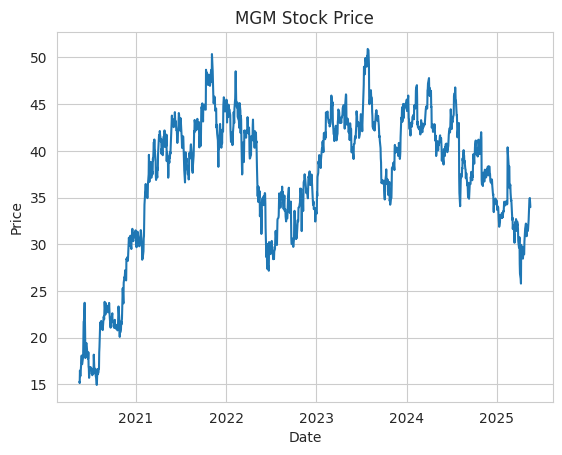

In [46]:

sns.lineplot(data=df,x=df.index, y='Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MGM Stock Price')

plt.show()

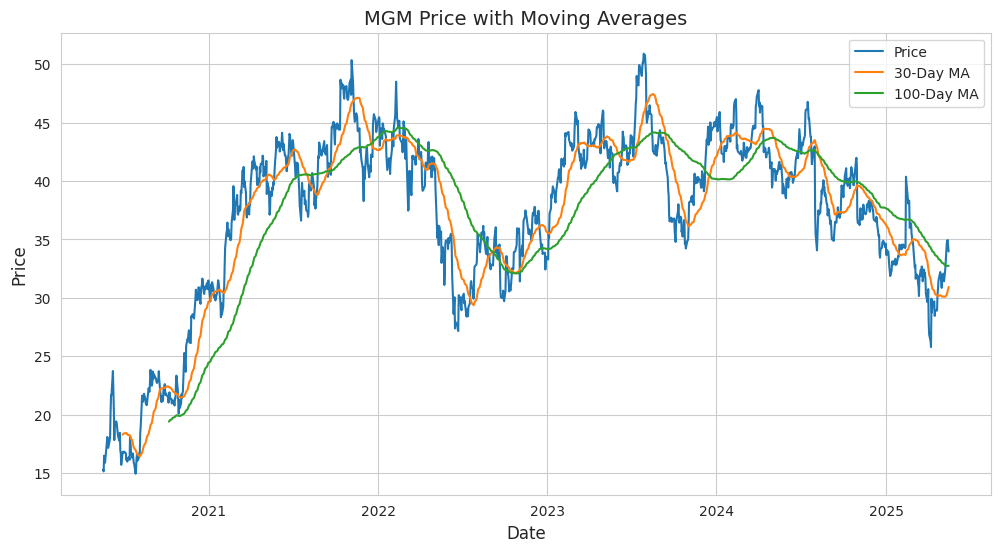

In [47]:
df['30D_MA'] = df['Price'].rolling(window=30).mean()
df['100D_MA'] = df['Price'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Price'], label='Price')
sns.lineplot(x=df.index, y=df['30D_MA'], label='30-Day MA')
sns.lineplot(x=df.index, y=df['100D_MA'], label='100-Day MA')
plt.title('MGM Price with Moving Averages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
#plt.tight_layout()
plt.show()

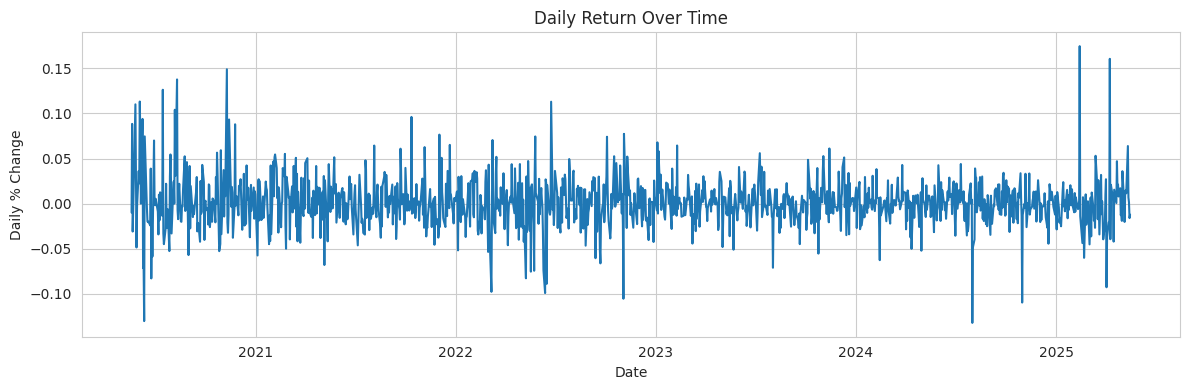

In [48]:
#Analysisng (Volatility) risky or stable was Tesla on a day-to-day basis, over the years
# Calculate daily return
df['Daily Return'] = df['Price'].pct_change()



# 📈 Line plot of Daily Returns
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df['Daily Return'])
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.grid(True)
plt.tight_layout()
plt.show()



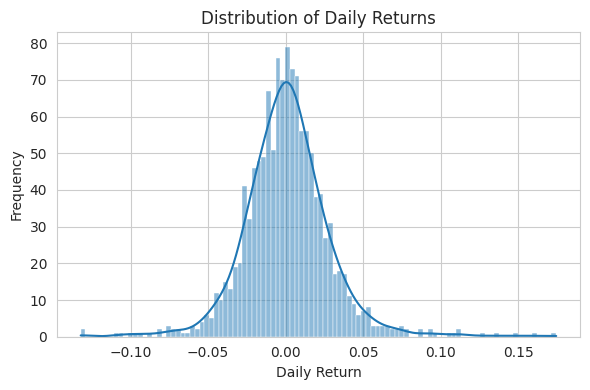

In [49]:
# 📊 Histogram of Daily Returns
plt.figure(figsize=(6, 4))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

**Model -Building**

*LSTM are sensitive to scale of data, so we apply MIN-MAX Scalar*

In [50]:
df.drop(columns={'30D_MA', '100D_MA', 'Daily Return'}, inplace=True)





In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))


In [52]:
df

array([[0.00967299],
       [0.00550492],
       [0.04273951],
       ...,
       [0.55636242],
       [0.54078639],
       [0.52910445]])

In [53]:
train_size = int(len(df)*0.65)
test_size = len(df)-train_size
train_data,test_data = df[0:train_size,:],df[train_size:len(df),:1]


In [54]:
(train_size,test_size)

(817, 440)

In [55]:
def create_dataset(dataset,time_step=1):
  dataX, dataY =  [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] #i=0,   1,2,3..
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)

In [56]:
#reshape into x=t,t+1,t+2,t+3
time_step = 100
x_train ,y_train = create_dataset(train_data,time_step)
x_test ,y_test = create_dataset(test_data,time_step)


In [57]:
(x_train.shape,y_train.shape)

((716, 100), (716,))

In [58]:
(x_test.shape,y_test.shape)

((339, 100), (339,))

In [59]:
#reshape input to be [samples,time steps ,features] which is required in LSTM. so converting in 3D shape because LSTM in keras expect input as [samples,time steps ,features]
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the Stacked LSTM model
model = Sequential()

# First LSTM layer (returns sequences to stack another LSTM)
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))

# Second LSTM layer (returns sequences to stack another)
model.add(LSTM(units=50, return_sequences=True))

# Third LSTM layer (final LSTM layer)
model.add(LSTM(units=50))

# Fully connected output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')




In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=64,

    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - loss: 0.2366 - val_loss: 0.0079
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0177 - val_loss: 0.0155
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - loss: 0.0109 - val_loss: 0.0057
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2

In [63]:
#  Predict on train and test data
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#  Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#  Evaluate performance using RMSE
import math
from sklearn.metrics import mean_squared_error

# RMSE on Training Data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print("Train Data RMSE:", train_rmse)

# RMSE on Test Data
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Test Data RMSE:", test_rmse)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Train Data RMSE: 38.4807900553685
Test Data RMSE: 38.35794275485456


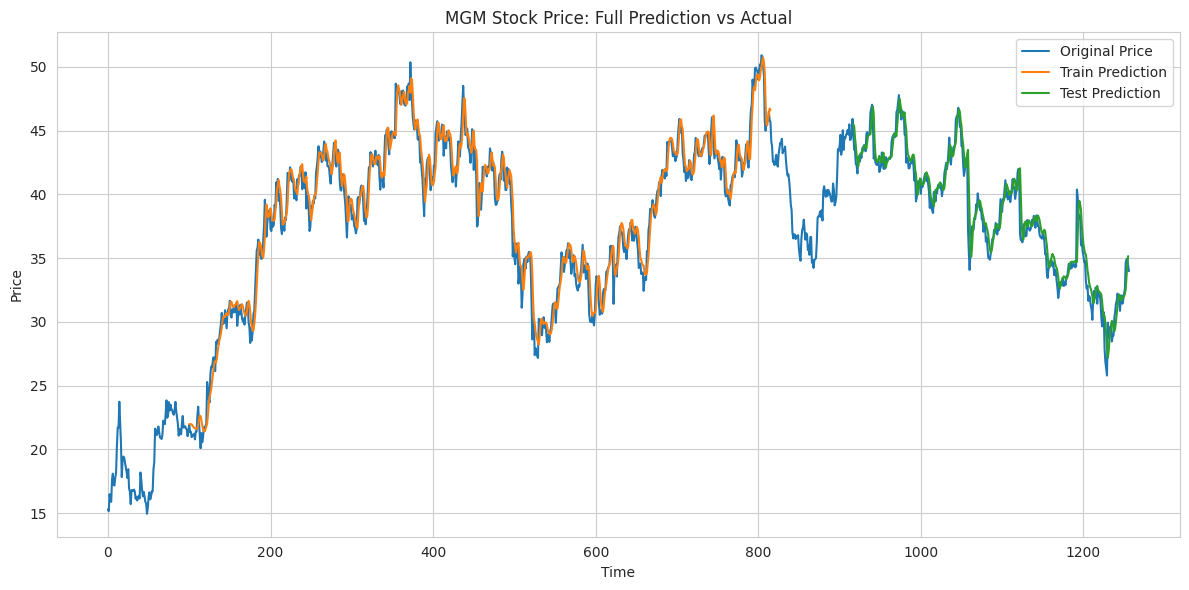

In [64]:
look_back = 100  # or set this to your input_window. time_step

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df), label='Original Price')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.grid(True)
plt.title("MGM Stock Price: Full Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [67]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


In [68]:
# Ensure correct date alignment by accounting for time_step (look_back)
plotting_data = pd.DataFrame(
    {
        'Actual Price': y_test_inv.reshape(-1),      # inverse transformed test values
        'Predicted Price': test_predict.reshape(-1)  # inverse transformed predictions
    },
    index=df2.index[-len(y_test)-time_step:-time_step]  # Adjusted index range
)

# View more rows to inspect
plotting_data.tail(15)


,Actual Price,Predicted Price
Date,,
2024-11-29,31.670000,30.698927
2024-12-02,32.209999,31.328175
2024-12-03,31.799999,31.889784
2024-12-04,31.459999,32.137520
2024-12-05,30.860001,32.063801
2024-12-06,31.969999,31.707718
2024-12-09,32.070000,31.690552
2024-12-10,31.420000,31.899729
2024-12-11,31.740000,31.947432


In [69]:
model.save('MGM_Train.keras')